# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
#!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# units = "metric" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] 
        city_lng = city_weather['coord']['lon'] 
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed'] 
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | as sulayyil
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | vilyuysk
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | road town
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | sterling
Processing Record 12 of Set 1 | walvis bay
Processing Record 13 of Set 1 | nar'yan-mar
Processing Record 14 of Set 1 | santa maria
Processing Record 15 of Set 1 | akbarabad
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | port blair
Processing Record 21 of Set 1 | ilulissat
Proce

Processing Record 38 of Set 4 | valentin gomez farias
Processing Record 39 of Set 4 | teluknaga
Processing Record 40 of Set 4 | sorsk
Processing Record 41 of Set 4 | polyarnyy
Processing Record 42 of Set 4 | chegdomyn
Processing Record 43 of Set 4 | berbera
Processing Record 44 of Set 4 | kitimat
Processing Record 45 of Set 4 | zhoushan
Processing Record 46 of Set 4 | minas de marcona
Processing Record 47 of Set 4 | yangor
City not found. Skipping...
Processing Record 48 of Set 4 | ambodifotatra
Processing Record 49 of Set 4 | hermanus
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | kutum
Processing Record 2 of Set 5 | eket
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | aasiaat
Processing Record 5 of Set 5 | axim
Processing Record 6 of Set 5 | bardai
Processing Record 7 of Set 5 | esikhaleni
Processing Record 8 of Set 5 | dikhil
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | prince rupert
Processing Record 11 of Set 5 | 

Processing Record 27 of Set 8 | cantagalo
Processing Record 28 of Set 8 | masindi
Processing Record 29 of Set 8 | murun-kuren
Processing Record 30 of Set 8 | rabaul
Processing Record 31 of Set 8 | ceerigaabo
Processing Record 32 of Set 8 | bonthe
Processing Record 33 of Set 8 | calvinia
Processing Record 34 of Set 8 | luderitz
Processing Record 35 of Set 8 | bumba
Processing Record 36 of Set 8 | mar del plata
Processing Record 37 of Set 8 | cannonvale
Processing Record 38 of Set 8 | coyhaique
Processing Record 39 of Set 8 | chernyshevskiy
Processing Record 40 of Set 8 | hammerfest
Processing Record 41 of Set 8 | leh
Processing Record 42 of Set 8 | dogubayazit
Processing Record 43 of Set 8 | eirunepe
Processing Record 44 of Set 8 | titusville
Processing Record 45 of Set 8 | sume
Processing Record 46 of Set 8 | palikir - national government center
Processing Record 47 of Set 8 | mount pearl
Processing Record 48 of Set 8 | borisoglebskiy
Processing Record 49 of Set 8 | wotho
Processing Re

Processing Record 16 of Set 12 | sungai penuh
Processing Record 17 of Set 12 | pitimbu
Processing Record 18 of Set 12 | gornyatskiy
Processing Record 19 of Set 12 | ibiza
Processing Record 20 of Set 12 | katabu
Processing Record 21 of Set 12 | kenora
Processing Record 22 of Set 12 | kupang
Processing Record 23 of Set 12 | murygino
Processing Record 24 of Set 12 | ceylanpinar
Processing Record 25 of Set 12 | letpandan
Processing Record 26 of Set 12 | qal'ah-ye shahr
Processing Record 27 of Set 12 | selfoss
Processing Record 28 of Set 12 | primorsko-akhtarsk
Processing Record 29 of Set 12 | maues
Processing Record 30 of Set 12 | cabo san lucas
Processing Record 31 of Set 12 | lydenburg
Processing Record 32 of Set 12 | severobaykal'sk
Processing Record 33 of Set 12 | naze
Processing Record 34 of Set 12 | katsuren-haebaru
Processing Record 35 of Set 12 | south hedland
Processing Record 36 of Set 12 | baiyin
Processing Record 37 of Set 12 | altai
Processing Record 38 of Set 12 | aioun
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
print(city_data_df.count())

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64


In [5]:
# Display sample data
print(city_data_df.head())

                          City      Lat       Lng  Max Temp  Humidity  \
0  edinburgh of the seven seas -37.0676  -12.3116     14.22        81   
1                       kodiak  57.7900 -152.4072      1.73        60   
2                  as sulayyil  20.4607   45.5779     23.14        37   
3                      stanley  54.8680   -1.6985      6.51        92   
4                     vilyuysk  63.7553  121.6247    -20.24        99   

   Cloudiness  Wind Speed Country        Date  
0           4        8.38      SH  1699816378  
1           0        2.06      US  1699816349  
2          77        3.79      SA  1699816379  
3          75        3.60      GB  1699816379  
4          42        2.16      RU  1699816379  


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.22,81,4,8.38,SH,1699816378
1,kodiak,57.7900,-152.4072,1.73,60,0,2.06,US,1699816349
2,as sulayyil,20.4607,45.5779,23.14,37,77,3.79,SA,1699816379
3,stanley,54.8680,-1.6985,6.51,92,75,3.60,GB,1699816379
4,vilyuysk,63.7553,121.6247,-20.24,99,42,2.16,RU,1699816379


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

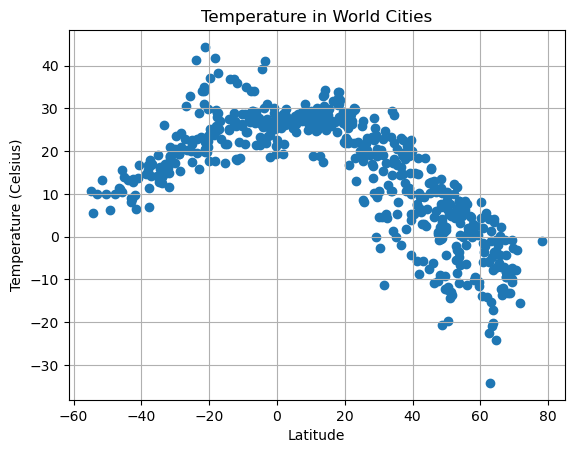

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

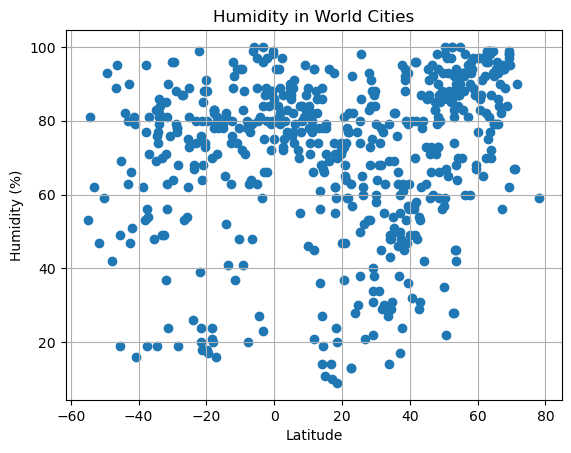

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

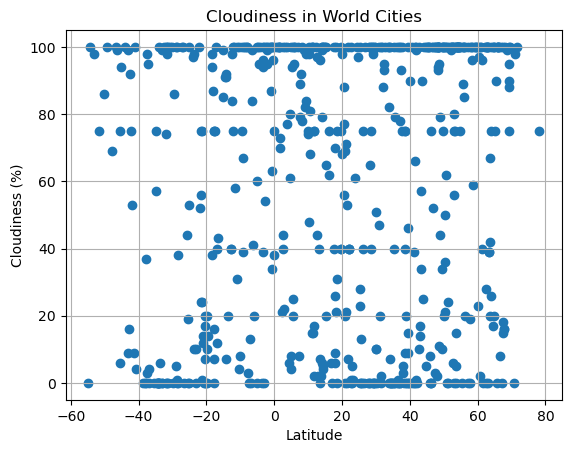

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

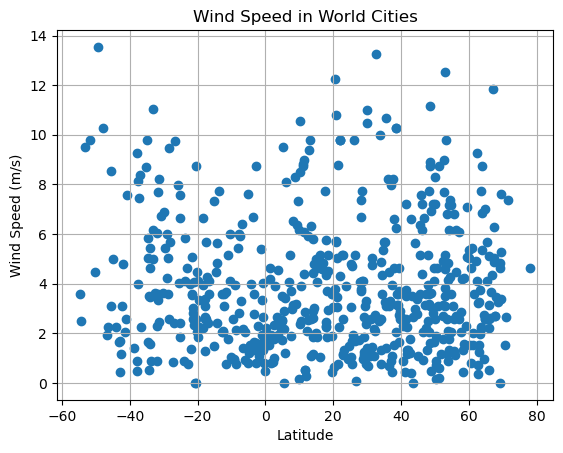

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
latitude = city_data_df['Lat']

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'].astype(int)>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,1.73,60,0,2.06,US,1699816349
2,as sulayyil,20.4607,45.5779,23.14,37,77,3.79,SA,1699816379
3,stanley,54.8680,-1.6985,6.51,92,75,3.60,GB,1699816379
4,vilyuysk,63.7553,121.6247,-20.24,99,42,2.16,RU,1699816379
5,bilibino,68.0546,166.4372,-13.18,89,100,3.47,RU,1699816380


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'].astype(int)<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.22,81,4,8.38,SH,1699816378
6,blackmans bay,-43.0167,147.3167,8.07,80,9,0.45,AU,1699816380
10,walvis bay,-22.9575,14.5053,15.74,80,10,0.77,NaN,1699816381
12,santa maria,-29.6842,-53.8069,23.65,96,86,5.42,BR,1699816381
14,grytviken,-54.2811,-36.5092,5.46,81,100,2.51,GS,1699816382


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8538816702112166


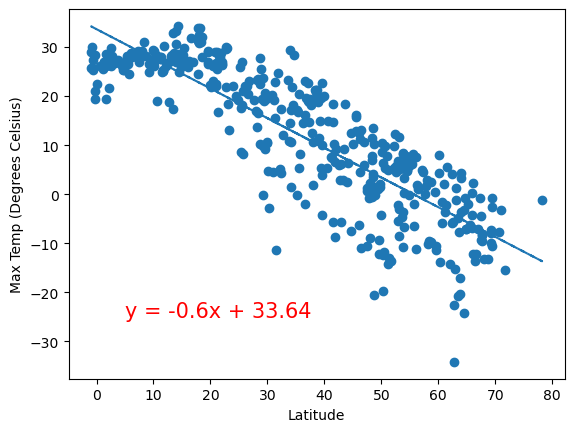

In [31]:
# Linear regression on Northern Hemisphere
ntemp_latitude = northern_hemi_df['Lat']
ntemp_temp = northern_hemi_df['Max Temp']
ntemp_slope, ntemp_int, ntemp_r, ntemp_p, ntemp_std_err = stats.linregress(ntemp_latitude, ntemp_temp)
ntemp_fit = ntemp_slope * ntemp_latitude + ntemp_int
line_eq = "y = " + str(round(ntemp_slope,2)) + "x + " + str(round(ntemp_int,2))

plt.scatter(ntemp_latitude,ntemp_temp)
plt.plot(ntemp_latitude,ntemp_fit,"--")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Degrees Celsius)')
print(f"The r-value is: {ntemp_r}")
plt.show()

The r-value is: 0.7196297707244066


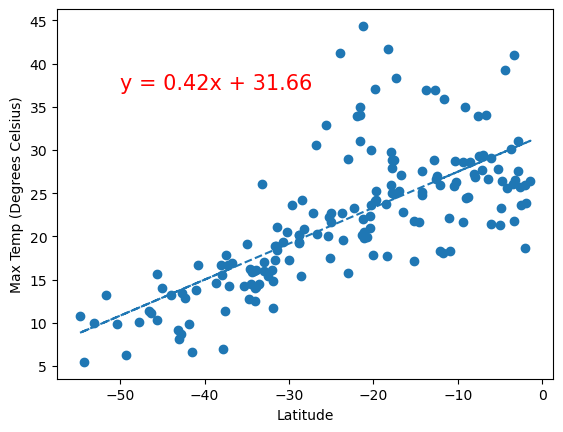

In [32]:
# Linear regression on Southern Hemisphere
stemp_latitude = southern_hemi_df['Lat']
stemp_temp = southern_hemi_df['Max Temp']
stemp_slope, stemp_int, stemp_r, stemp_p, stemp_std_err = stats.linregress(stemp_latitude, stemp_temp)
stemp_fit = stemp_slope * stemp_latitude + stemp_int
line_eq = "y = " + str(round(stemp_slope,2)) + "x + " + str(round(stemp_int,2))

plt.scatter(stemp_latitude,stemp_temp)
plt.plot(stemp_latitude,stemp_fit,"--")
plt.annotate(line_eq,(-50,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Degrees Celsius)')
print(f"The r-value is: {stemp_r}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The above graphs show a positive relationship between latitude and max temperature in the southern hemisphere, and a negative relationship between latitude and max temperature in the northern hemisphere. This suggests that max temperature increases as you get closer to the Equator, which is located at 0 latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20068049123120338


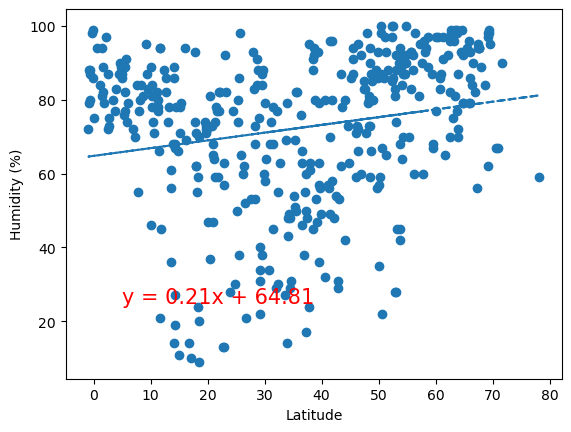

In [33]:
# Northern Hemisphere
ntemp_humid = northern_hemi_df['Humidity']
ntemp_slope, ntemp_int, ntemp_r, ntemp_p, ntemp_std_err = stats.linregress(ntemp_latitude, ntemp_humid)
ntemp_fit = ntemp_slope * ntemp_latitude + ntemp_int
line_eq = "y = " + str(round(ntemp_slope,2)) + "x + " + str(round(ntemp_int,2))

plt.scatter(ntemp_latitude,ntemp_humid)
plt.plot(ntemp_latitude,ntemp_fit,"--")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {ntemp_r}")
plt.show()

The r-value is: 0.13631510602849173


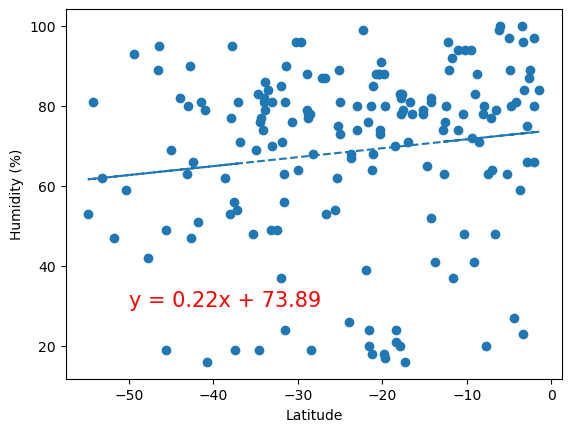

In [34]:
# Southern Hemisphere
stemp_humid = southern_hemi_df['Humidity']
stemp_slope, stemp_int, stemp_r, stemp_p, stemp_std_err = stats.linregress(stemp_latitude, stemp_humid)
stemp_fit = stemp_slope * stemp_latitude + stemp_int
line_eq = "y = " + str(round(stemp_slope,2)) + "x + " + str(round(stemp_int,2))

plt.scatter(stemp_latitude,stemp_humid)
plt.plot(stemp_latitude,stemp_fit,"--")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {stemp_r}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The above graphs show a slightly positive relationship between latitude and humidity in both the northern and southern hemispheres. This suggests that humidity continues to increase the further you go north, and that it is not the primary factor for the Equator being so warm.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05581562470331977


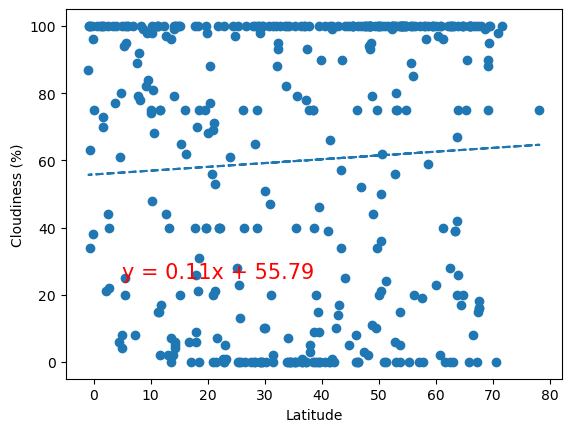

In [35]:
# Northern Hemisphere
ntemp_cloud = northern_hemi_df['Cloudiness']
ntemp_slope, ntemp_int, ntemp_r, ntemp_p, ntemp_std_err = stats.linregress(ntemp_latitude, ntemp_cloud)
ntemp_fit = ntemp_slope * ntemp_latitude + ntemp_int
line_eq = "y = " + str(round(ntemp_slope,2)) + "x + " + str(round(ntemp_int,2))

plt.scatter(ntemp_latitude,ntemp_cloud)
plt.plot(ntemp_latitude,ntemp_fit,"--")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {ntemp_r}")
plt.show()

The r-value is: 0.11493225745999032


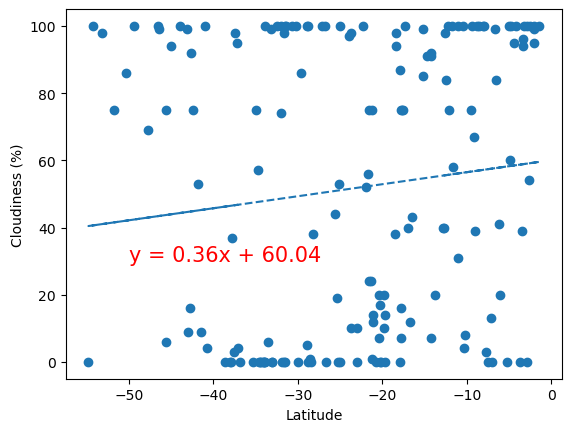

In [36]:
# Southern Hemisphere
stemp_cloud = southern_hemi_df['Cloudiness']
stemp_slope, stemp_int, stemp_r, stemp_p, stemp_std_err = stats.linregress(stemp_latitude, stemp_cloud)
stemp_fit = stemp_slope * stemp_latitude + stemp_int
line_eq = "y = " + str(round(stemp_slope,2)) + "x + " + str(round(stemp_int,2))

plt.scatter(stemp_latitude,stemp_cloud)
plt.plot(stemp_latitude,stemp_fit,"--")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {stemp_r}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Cloudiness also increases slightly the further north you go, meaning it is likely not a major factor in the warmth of the Equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04974678890376751


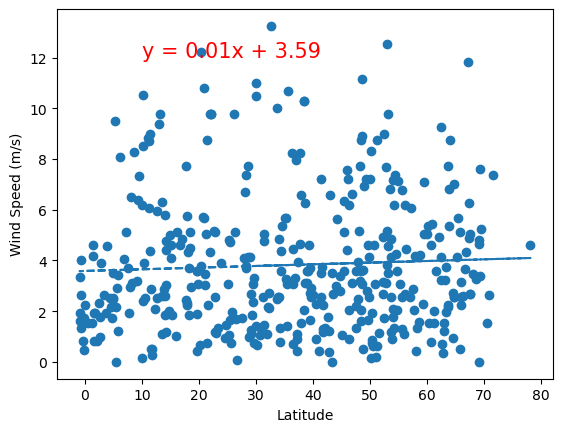

In [37]:
# Northern Hemisphere
ntemp_wind = northern_hemi_df['Wind Speed']
ntemp_slope, ntemp_int, ntemp_r, ntemp_p, ntemp_std_err = stats.linregress(ntemp_latitude, ntemp_wind)
ntemp_fit = ntemp_slope * ntemp_latitude + ntemp_int
line_eq = "y = " + str(round(ntemp_slope,2)) + "x + " + str(round(ntemp_int,2))

plt.scatter(ntemp_latitude,ntemp_wind)
plt.plot(ntemp_latitude,ntemp_fit,"--")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-value is: {ntemp_r}")
plt.show()

The r-value is: -0.27356728202226216


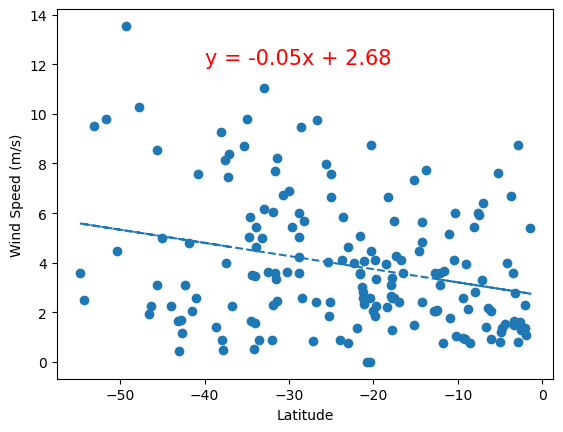

In [38]:
# Southern Hemisphere
stemp_wind = southern_hemi_df['Wind Speed']
stemp_slope, stemp_int, stemp_r, stemp_p, stemp_std_err = stats.linregress(stemp_latitude, stemp_wind)
stemp_fit = stemp_slope * stemp_latitude + stemp_int
line_eq = "y = " + str(round(stemp_slope,2)) + "x + " + str(round(stemp_int,2))

plt.scatter(stemp_latitude,stemp_wind)
plt.plot(stemp_latitude,stemp_fit,"--")
plt.annotate(line_eq,(-40,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-value is: {stemp_r}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The relationship between latitude and wind speed is quite interesting, and it may tell a compelling story as to the factors contributing to the Equator's temperature. Wind speed decreases as we move from the southernmost latitudes toward the Equator, but it then begins to increase very slightly as we move north from there. Perhaps the lack of wind at 0 latitude combined with other conditions contributes to the warm temperatures we see there.